## Geração Tech Unimed-BH - Ciência de Dados - Básico  126 hrs

###                                          Projeto Covid-19

In [61]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

In [62]:
#importação do dataframe

df=pd.read_csv('dados/covid_19_data.csv',parse_dates=['ObservationDate','Last Update'])
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [63]:
#verificando os tipos de dados da coluna
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [64]:
# padronizando os nomes das colunas
import re
def corrige_colunas(col_name):
    
    return re.sub(r"[/| ]","",col_name).lower()

In [65]:
#corrigindo os nomes da coluna

df.columns=[corrige_colunas(col)for col in df.columns]
df.head()

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


#Brasil

- selecionando apenas os dados do brasil para análises.

In [66]:
brasil=df.loc[(df.countryregion=='Brazil') & (df.confirmed >0)]

brasil.head()

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0


# Casos Confirmados entre  26/02/2020 e 19/05/2020

In [67]:
#Gráfico de casos confirmados no Brasil.

px.line(brasil,'observationdate','confirmed',title='Número de casos confirmados no Brasil')

In [68]:
#Novos casos por dia



brasil['novoscasos']=list(map(
    lambda x:0 if(x==0) else brasil['confirmed'].iloc[x]-brasil['confirmed'].iloc[x-1],
    np.arange(brasil.shape[0])
))

/home/jefferson/Área de Trabalho/covid_19/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
brasil.head()

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered,novoscasos
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,1.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,0.0


In [70]:
#Total de casos por dia

px.line(brasil,'observationdate','novoscasos',title='Numero de casos por dia')

In [71]:
# Construindo um gráfico para número de mortes.





fig=go.Figure()

fig.add_trace(
    
    go.Scatter(x=brasil.observationdate,y=brasil.deaths,name='Mortes',mode='lines+markers',line={'color':'red'})
)
#layout

fig.update_layout(title='Mortes por COVID-19 Brasil entre 26/02 a 19/05 de 2020')

fig.show()




# Taxa de Crescimento

taxa_crescimento=(presente/passado)**(1/n) - 1


In [72]:
def  taxa_crescimento(data,variable,data_inicio=None,data_fim=None):
    
    if data_inicio==None:
        data_inicio=data.observationdate.loc[data[variable]>0].min()
    else:
        data_inicio=pd.to_datetime(data_inicio)
        
        
    if data_fim==None:
        data_fim=data.observationdate.iloc[-1]
        
    else:
        data_fim=pd.to_datetime(data_fim)
        
    #define valores presente passado
    
    passado=data.loc[data.observationdate==data_inicio,variable].values[0]
    presente=data.loc[data.observationdate==data_fim,variable].values[0]
    
    #define número de pontos no tempo que vamos avaliar
    
    n=(data_fim-data_inicio).days
    
    #calcular a taxa
    
    taxa=( presente / passado )**(1/n) - 1
    
    return taxa *100

In [73]:
#Taxa média de COVID-19 do período no brasil

taxa_crescimento(brasil,'confirmed')

16.27183353112116

In [74]:
#Calculando  a taxa diária

def taxa_crescimento_diaria(data,variable,data_inicio=None):
    
    if data_inicio==None:
        data_inicio=data.observationdate.loc[data[variable]>0].min()
    else:
        data_inicio=pd.to_datetime(data_inicio)
        
    data_fim=data.observationdate.max()
    
    #define número de pontos no tempo que vamos avaliar
    
    n=(data_fim-data_inicio).days
    
    
    #taxa de um dia para outro
    
    taxas=list(map(
        lambda x:(data[variable].iloc[x]-data[variable].iloc[x-1])/data[variable].iloc[x-1],range(1,n+1)
    ))
    
    return np.array(taxas)*100

In [75]:
tx_dia=taxa_crescimento_diaria(brasil,'confirmed')
tx_dia

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

In [76]:
primeiro_dia=brasil.observationdate.loc[brasil.confirmed > 0].min()

px.line(x=pd.date_range(primeiro_dia,brasil.observationdate.max())[1:],
        y=tx_dia,title='Taxa diária de casos confirmados de Covid-19 no Brasil nas datas 26/02 a 19/02 de 2020')

# Predições

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


In [78]:
#predição de casos confirmados

confirmados=brasil.confirmed
confirmados.index=brasil.observationdate
confirmados.head()

observationdate
2020-02-26    1.0
2020-02-27    1.0
2020-02-28    1.0
2020-02-29    2.0
2020-03-01    2.0
Name: confirmed, dtype: float64

In [79]:
res=seasonal_decompose(confirmados)


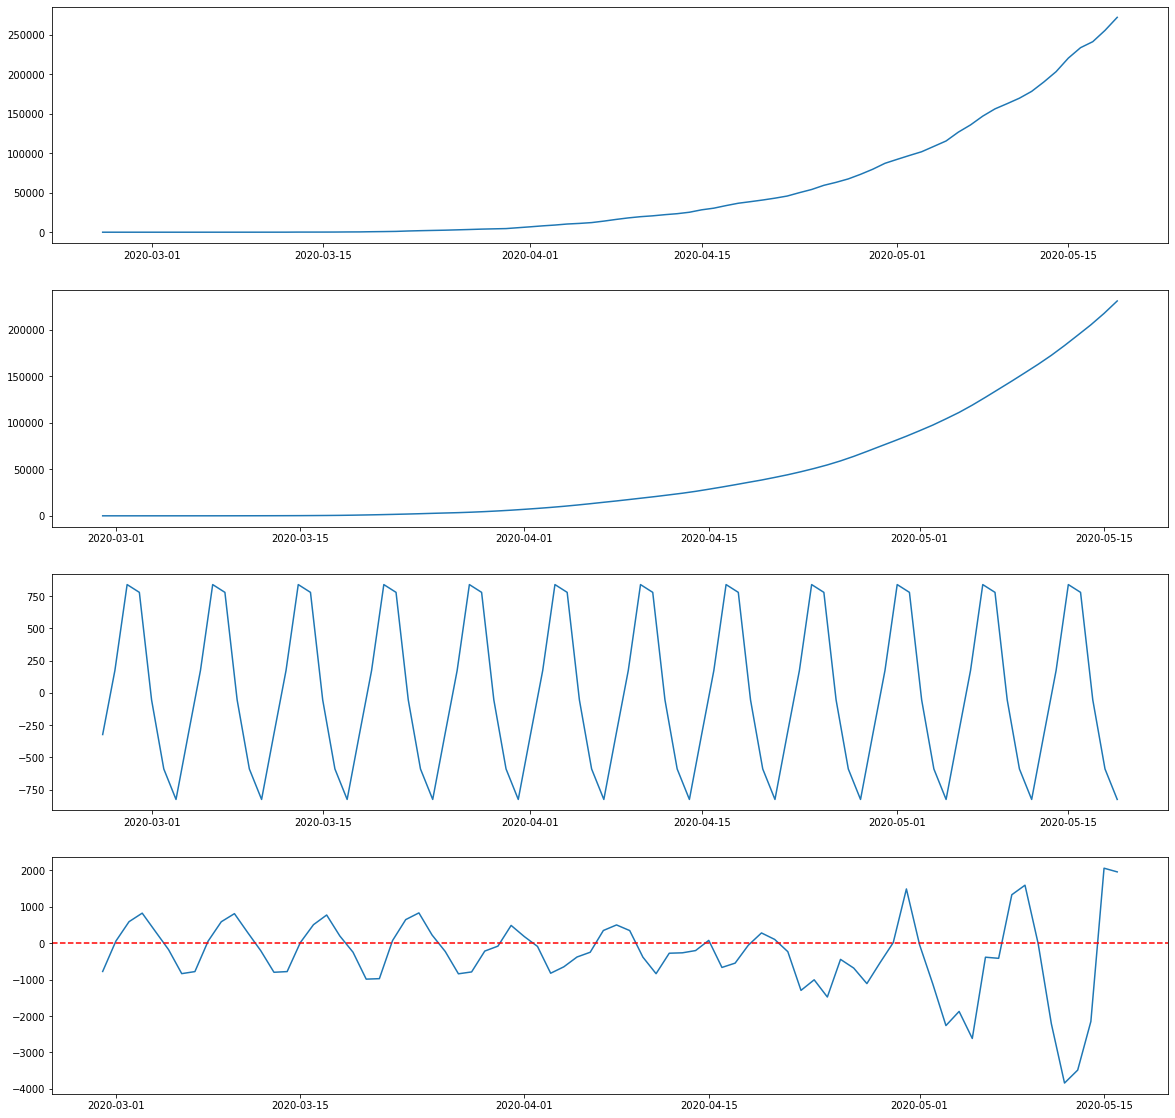

In [80]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(20,20))

ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(confirmados.index,res.resid)
ax4.axhline(0,linestyle='dashed',c='red')

plt.show()

# Modelo Arima

In [81]:
from pmdarima.arima import auto_arima


In [82]:
modelo=auto_arima(confirmados)

In [83]:
fig=go.Figure(go.Scatter(
    x=confirmados.index,y=confirmados,name='Observados'
))

fig.add_trace(
    go.Scatter(x=confirmados.index,y=modelo.predict_in_sample(),name='Preditos')
)

fig.add_trace(
    go.Scatter(x=pd.date_range('2020-05-20','2020-06-20'),y=modelo.predict(31),name='Forecast')
)

fig.update_layout(title='Previsão de casos confirmados no Brasil para os próximos 30 dias.')
fig.show()

# Modelo de Crescimento

In [84]:
from fbprophet import Prophet

In [85]:
#processamento
train=confirmados.reset_index()[:-5]
test=confirmados.reset_index()[-5:]

#renomeando as colunas o algoritmo da biblioteca pede.
train.rename(columns={'observationdate':'ds','confirmed':'y'},inplace=True)
test.rename(columns={'observationdate':'ds','confirmed':'y'},inplace=True)

#definir o modelo de crescimento
profeta=Prophet(growth='logistic',changepoints=['2020-03-21','2020-03-30','2020-04-25','2020-05-03','2020-05-10'])

pop=211463256

train['cap']=pop

#treina modelo
profeta.fit(train)

#construindo previsões
future_dates=profeta.make_future_dataframe(periods=200)

future_dates['cap']=pop
forecast=profeta.predict(future_dates)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [86]:



fig=go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds,y=forecast.yhat,name='Predição'))

#fig.add_trace(go.Scatter(x=test.index,y=test,name='Observados-Teste'))

fig.add_trace(go.Scatter(x=train.ds,y=train.y,name='Observados-Treino'))

fig.update_layout(title='Predições de casos confirmados no Brasil')
fig.show()

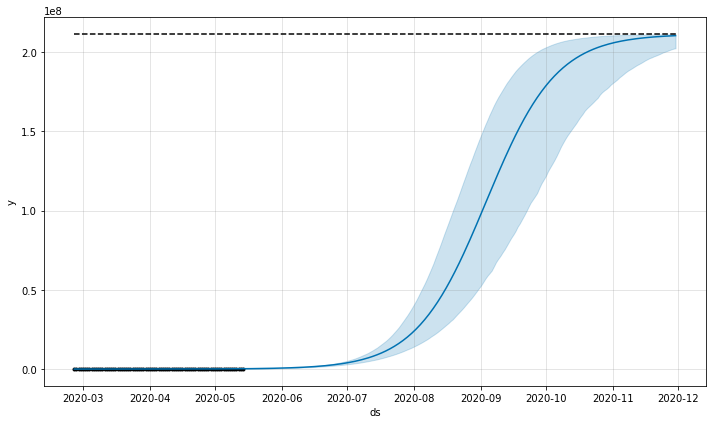

In [87]:
fig1 = profeta.plot(forecast, uncertainty=True)